In [1]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import csv
import os, sys
import dill
import seaborn as sns

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
# re_tokenizer = RegexpTokenizer(r'\w+')
re_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Get number of towns

In [2]:
alnc_path = '/Users/nknezek/Documents/Insight_local/project/data/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/'

In [3]:
states = os.listdir(alnc_path)
print('{} states found'.format(len(states)))

51 states found


In [4]:
towns = {}
town_counts = []
for st in states:
    towns[st] = os.listdir(alnc_path+st+'/')
    town_counts.append(len(towns[st]))
#     print('{} towns in {}'.format(len(towns[st]),st))

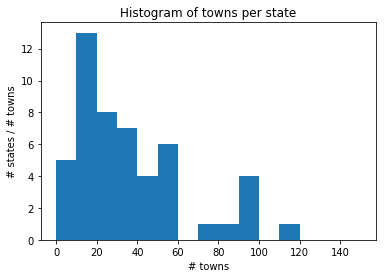

In [5]:
plt.hist(town_counts,bins=np.linspace(0,150,16))
plt.xlabel('# towns')
plt.ylabel('# states / # towns')
plt.title("Histogram of towns per state")
plt.savefig('towns_per_state.pdf')

In [18]:
mean = np.mean(town_counts)
med = np.median(town_counts)
mx = np.max(town_counts)
mn = np.min(town_counts)
print(mean,med,mx,mn)
sortedstates = np.array(states)[np.argsort(town_counts)]
sortedcounts = sorted(town_counts)
print([x for x in zip(sortedstates,sortedcounts)])

38.05882352941177 28.0 162 4
[('DC', 4), ('DE', 6), ('HI', 6), ('NV', 6), ('WY', 8), ('ME', 10), ('RI', 10), ('AK', 11), ('ID', 12), ('NM', 12), ('VT', 12), ('MD', 13), ('ND', 14), ('NH', 16), ('SD', 17), ('MT', 18), ('UT', 19), ('MS', 19), ('SC', 20), ('WV', 20), ('NE', 21), ('LA', 22), ('KY', 24), ('CT', 27), ('AL', 27), ('OK', 28), ('NJ', 30), ('AZ', 31), ('TN', 31), ('OR', 32), ('MO', 36), ('CO', 36), ('WA', 37), ('GA', 41), ('IA', 42), ('IN', 46), ('AR', 48), ('KS', 50), ('WI', 52), ('NC', 53), ('VA', 54), ('MI', 58), ('FL', 59), ('MA', 74), ('IL', 84), ('PA', 90), ('OH', 91), ('NY', 94), ('MN', 97), ('TX', 111), ('CA', 162)]


# Get papers in towns

In [19]:
papers = {}
paper_counts = {}
raw_paper_counts = []
max_ps = 0
g1_papers_towns = []
g1_papers_counts = []
for st in states:
    paper_counts[st] = []
    papers[st] = {}
    for tn in towns[st]:
        ps = os.listdir(alnc_path+st+'/'+tn+'/')
        papers[st][tn] = ps
        paper_counts[st].append(len(ps))
        raw_paper_counts.append(len(ps))
        if len(ps) > max_ps:
            max_papers_town = tn+', '+st
            max_ps = len(ps)
        if len(ps) > 1:
            g1_papers_towns.append(tn+', '+st)
            g1_papers_counts.append(len(ps))

print('{} has most papers at {}'.format(max_papers_town, max_ps))
print('{} towns have >1 paper'.format(len(g1_papers_towns)))
print('{} towns have >2 papers'.format(sum([1 for x in g1_papers_counts if x>2])))

New_York, NY has most papers at 21
176 towns have >1 paper
56 towns have >2 papers


In [71]:
[x for x in zip(g1_papers_towns,g1_papers_counts)]

[('Barre, VT', 3),
 ('Richmond, VA', 2),
 ('Norfolk, VA', 2),
 ('Arlington, VA', 2),
 ('Alexandria, VA', 2),
 ('Warrenton, VA', 2),
 ('Charlottesville, VA', 3),
 ('Rapid_City, SD', 2),
 ('Beaufort, SC', 2),
 ('Columbia, SC', 2),
 ('Charleston, SC', 3),
 ('Salt_Lake_City, UT', 4),
 ('Moab, UT', 2),
 ('Provo, UT', 2),
 ('Atlanta, GA', 2),
 ('Columbus, GA', 2),
 ('Macon, GA', 2),
 ('Augusta, GA', 2),
 ('Athens, GA', 2),
 ('Tupelo, MS', 2),
 ('Kalispell, MT', 2),
 ('Billings, MT', 3),
 ('Jefferson_City, MO', 2),
 ('Columbia, MO', 2),
 ('St_Louis, MO', 4),
 ('Kansas_City, MO', 2),
 ('Worcester, MA', 2),
 ('New_Bedford, MA', 2),
 ('Hyannis, MA', 2),
 ('Framingham, MA', 2),
 ('Boston, MA', 6),
 ('North_Andover, MA', 2),
 ('Anchorage, AK', 2),
 ('Louisville, KY', 2),
 ('Montgomery, AL', 2),
 ('Anniston, AL', 2),
 ('Winona, MN', 2),
 ('Minneapolis, MN', 6),
 ('Detroit, MI', 4),
 ('Monroe, MI', 2),
 ('Grand_Rapids, MI', 2),
 ('East_Lansing, MI', 2),
 ('Traverse_City, MI', 3),
 ('Ada, OK', 2),
 (

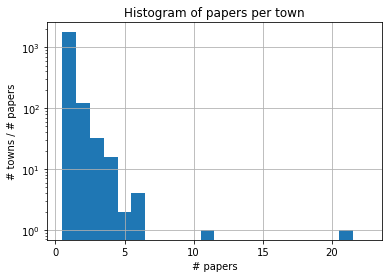

In [59]:
plt.hist(raw_paper_counts,bins=np.linspace(.5,22.5,23), log=True)
plt.grid()
plt.xlabel('# papers')
plt.ylabel('# towns / # papers')
plt.title("Histogram of papers per town")
plt.savefig('papers_per_town_log.pdf')

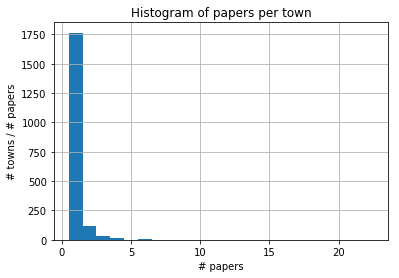

In [58]:
plt.hist(raw_paper_counts,bins=np.linspace(.5,22.5,23))
plt.grid()
plt.xlabel('# papers')
plt.ylabel('# towns / # papers')
plt.title("Histogram of papers per town")
plt.savefig('papers_per_town_linear.pdf')

# Articles per paper

In [20]:
article_counts = {}
raw_article_counts = []
max_ps = 0
g1_papers_towns = []
g1_papers_counts = []
for st in states:
    article_counts[st] = {}
    for tn in towns[st]:
        ps = os.listdir(alnc_path+st+'/'+tn+'/')
        article_counts[st][tn] = []
        for p in papers[st][tn]:
            ac = len(os.listdir(alnc_path+st+'/'+tn+'/'+p+'/'))
            article_counts[st][tn].append(ac)
            raw_article_counts.append(ac)

print('{} articles total'.format(sum(raw_article_counts)))
# print('{} towns have >1 paper'.format(len(g1_papers_towns)))
# print('{} towns have >2 papers'.format(sum([1 for x in g1_papers_counts if x>2])))

8695171 articles total


In [21]:
article_per_towns = []
for st in states:
    for tn in towns[st]:
        article_per_towns.append(sum(article_counts[st][tn]))

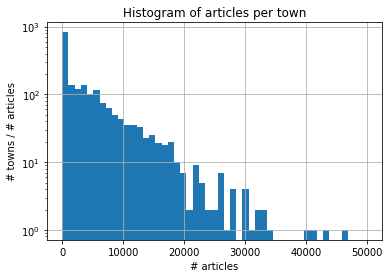

In [104]:
plt.hist(article_per_towns,bins=np.linspace(0,50000,50),log=True)
plt.grid()
plt.xlabel('# articles')
plt.ylabel('# towns / # articles')
plt.title("Histogram of articles per town")
plt.savefig('articles_per_town_log.pdf')

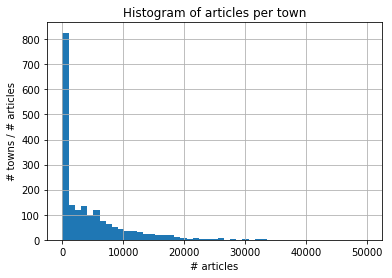

In [107]:
plt.hist(article_per_towns,bins=np.linspace(0,50000,50),log=False)
plt.grid()
plt.xlabel('# articles')
plt.ylabel('# towns / # articles')
plt.title("Histogram of articles per town")
plt.savefig('articles_per_town_linear.pdf')

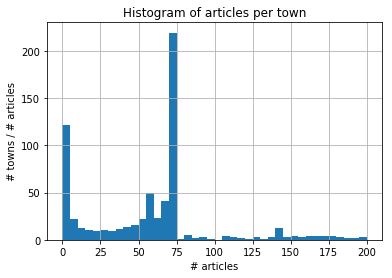

In [112]:
plt.hist(article_per_towns,bins=np.linspace(0,200,41),log=False)
plt.grid()
plt.xlabel('# articles')
plt.ylabel('# towns / # articles')
plt.title("Histogram of articles per town")
plt.savefig('articles_per_town_linear_zoom.pdf')

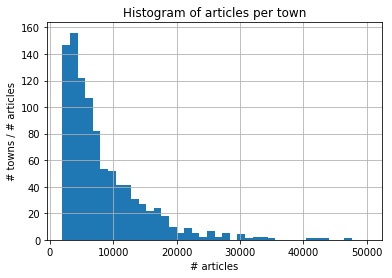

In [114]:
plt.hist(article_per_towns,bins=np.linspace(2000,50000,41),log=False)
plt.grid()
plt.xlabel('# articles')
plt.ylabel('# towns / # articles')
plt.title("Histogram of articles per town")
plt.savefig('articles_per_town_linear_cutoff.pdf')

# Words per article

In [22]:
stop_stems = dill.load(open("/Users/nknezek/Documents/Insight Local Folder/regional news/wordlists/stop_stems.m",'rb'))
stop_words = dill.load(open("/Users/nknezek/Documents/Insight Local Folder/regional news/wordlists/stop_words.m",'rb'))
go_stems = dill.load(open("/Users/nknezek/Documents/Insight Local Folder/regional news/wordlists/SCOWL-custom/stems.m",'rb'))
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stemmer = SnowballStemmer('english')


In [26]:
def tokenize_article_content_for_length(text_string, tokenizer, stop_words, stemmer, verbose=False, ):
    """
    Simple preprocessing pipeline which uses RegExp, sets basic token requirements, and removes stop words.
    """    
    # process articles
    cleaned_stems = []
    tokens = tokenizer.tokenize(text_string.lower())
    for token in tokens:
        stem = stemmer.stem(token)
        if (stem not in stop_stems):
            if stem in go_stems:
                if len(token) > 0 and len(token) < 20: # removes non words
                    cleaned_stems.append(stem)
    return len(cleaned_stems)

In [28]:
word_counts = {}
word_counts_raw = {}
for st in states:
    word_counts[st] = {}
    word_counts_raw[st] = {}
    for tn in towns[st]:
        word_counts[st][tn] = []
        word_counts_raw[st][tn] = []
        for p in papers[st][tn]:
            arps = os.listdir(alnc_path+st+'/'+tn+'/'+p+'/')
            for i in range(0,len(arps),100):
                file_path = alnc_path+st+'/'+tn+'/'+p+'/'+arps[i]
                try:
                    with open(file_path, 'r') as content_file:
                        raw_text = content_file.read()
                    word_counts_raw[st][tn].append( len(tokenizer.tokenize(raw_text)))
                    word_counts[st][tn].append(tokenize_article_content_for_length(raw_text, tokenizer=tokenizer, stop_words=stop_words, stemmer=stemmer))
                except:
                    print('error'+st+'/'+tn+'/'+p)

In [30]:
word_counts_all = []
word_counts_raw_all = []
for st in states:
    for tn in towns[st]:
        word_counts_all += word_counts[st][tn]
        word_counts_raw_all += word_counts_raw[st][tn]

In [71]:
word_counts['AK']['Ketchikan']

[144, 132, 142, 133, 119, 16, 227, 242, 191, 367]

In [38]:
np.max(word_counts_raw_all)

89415

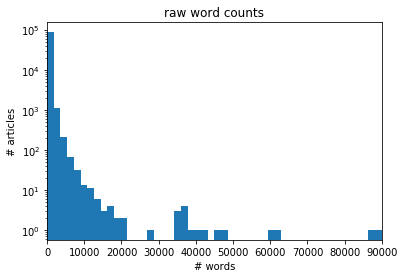

In [45]:
plt.hist(word_counts_raw_all,bins=np.linspace(0,90000,51),log=True)
plt.xlim(0,90000)
plt.title('raw word counts')
plt.ylabel('# articles')
plt.xlabel('# words')
plt.savefig('words_per_article_log.pdf')

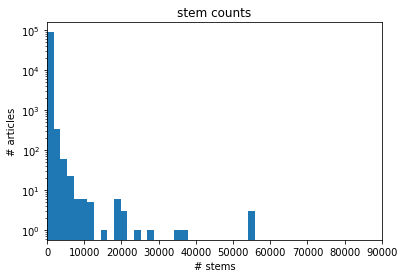

In [50]:
plt.hist(word_counts_all,bins=np.linspace(0,90000,51),log=True)
plt.xlim(0,90000)
plt.title('stem counts')
plt.ylabel('# articles')
plt.xlabel('# stems')
plt.savefig('stems_per_article_log.pdf')

Text(0.5,0,'# words')

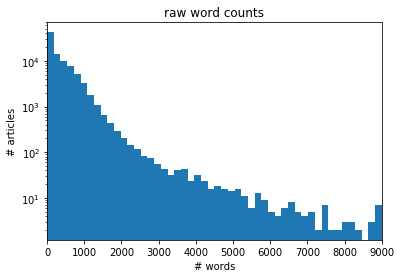

In [57]:
plt.hist(word_counts_raw_all,bins=np.linspace(0,9000,51),log=True)
plt.xlim(0,9000)
plt.title('raw word counts')
plt.ylabel('# articles')
plt.xlabel('# words')

Text(0.5,0,'# stems')

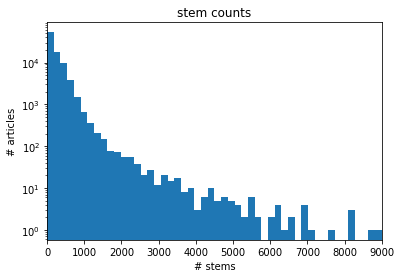

In [53]:
plt.hist(word_counts_all,bins=np.linspace(0,9000,51),log=True)
plt.xlim(0,9000)
plt.title('stem counts')
plt.ylabel('# articles')
plt.xlabel('# stems')

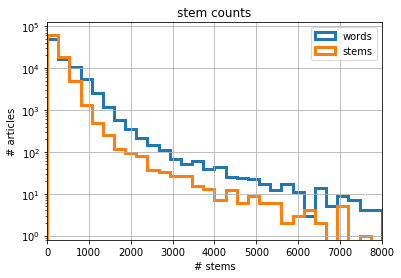

In [68]:
nbins = 31
xmax = 8000
plt.hist(word_counts_raw_all,bins=np.linspace(0,xmax,nbins),log=True,histtype='step',lw=3,label='words')
plt.hist(word_counts_all,bins=np.linspace(0,xmax,nbins),log=True,histtype='step',lw=3,label='stems')
plt.xlim(0,xmax)
plt.ylim(.8,)
plt.title('stem counts')
plt.ylabel('# articles')
plt.xlabel('# stems')
plt.grid()
plt.legend()
plt.savefig('wordstemcounts_log.pdf')

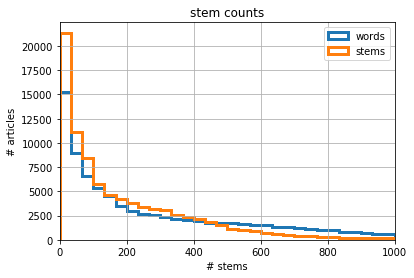

In [70]:
nbins = 31
xmax = 1000
log = False
plt.hist(word_counts_raw_all,bins=np.linspace(0,xmax,nbins),log=log,histtype='step',lw=3,label='words')
plt.hist(word_counts_all,bins=np.linspace(0,xmax,nbins),log=log,histtype='step',lw=3,label='stems')
plt.xlim(0,xmax)
plt.ylim(.8,)
plt.title('stem counts')
plt.ylabel('# articles')
plt.xlabel('# stems')
plt.grid()
plt.legend()
plt.savefig('wordstemcounts_linear.pdf')

# save Exploratory data

In [ ]:
exploratory_data = {
    'papers': paper,
    'paper_counts': paper_counts,
    'raw_paper_counts': raw_paper_counts,
    'article_counts': article_counts,
    'raw_article_counts': raw_article_counts,
    'word_counts_raw': word_counts_raw,
    'word_counts': word_counts,
    'word_counts_raw_all': word_counts_raw_all,
    'word_counts_all': word_counts_all,
}
dill.dump(exploratory_data, open('exploratory_data.m','wb'))

In [11]:
exploratory_data = dill.load(open('exploratory_data.m','rb'))

In [14]:
exploratory_data['papers']['CA']['Berkeley']

['www.dailycal.org', 'www.berkeleydailyplanet.com', 'www.insidebayarea.com']

# Select Towns

In [5]:
data = dill.load(open('exploratory_data.m','rb'))

In [11]:
ac = data['article_counts']
statetns = []
for st in ac.keys():
    for tn in ac[st].keys():
        statetns.append((st,tn,ac[st][tn][0]))

In [12]:
df = pd.DataFrame(statetns,columns=['state','town','num_articles'])

In [18]:
Nart = 2000
df_art = df[df['num_articles']>Nart]

In [23]:
for st in df_art['state'].values:
    df_art[df_art['state']==st]

,state,town,num_articles
0,VT,Middlebury,5531
1,VT,Bennington,11556
5,VT,West_Dover,3997
6,VT,Killington,2875
9,VT,Woodstock,5368
10,VT,St_Albans,2324
11,VT,Brattleboro,10005
